## What Is Statistical Learning?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model # regressor

### Advertising Data

In [2]:
# get Advertising data
Advertising = pd.read_csv(r"Advertising.csv", index_col=0)

In [3]:
Advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Figure 2.1

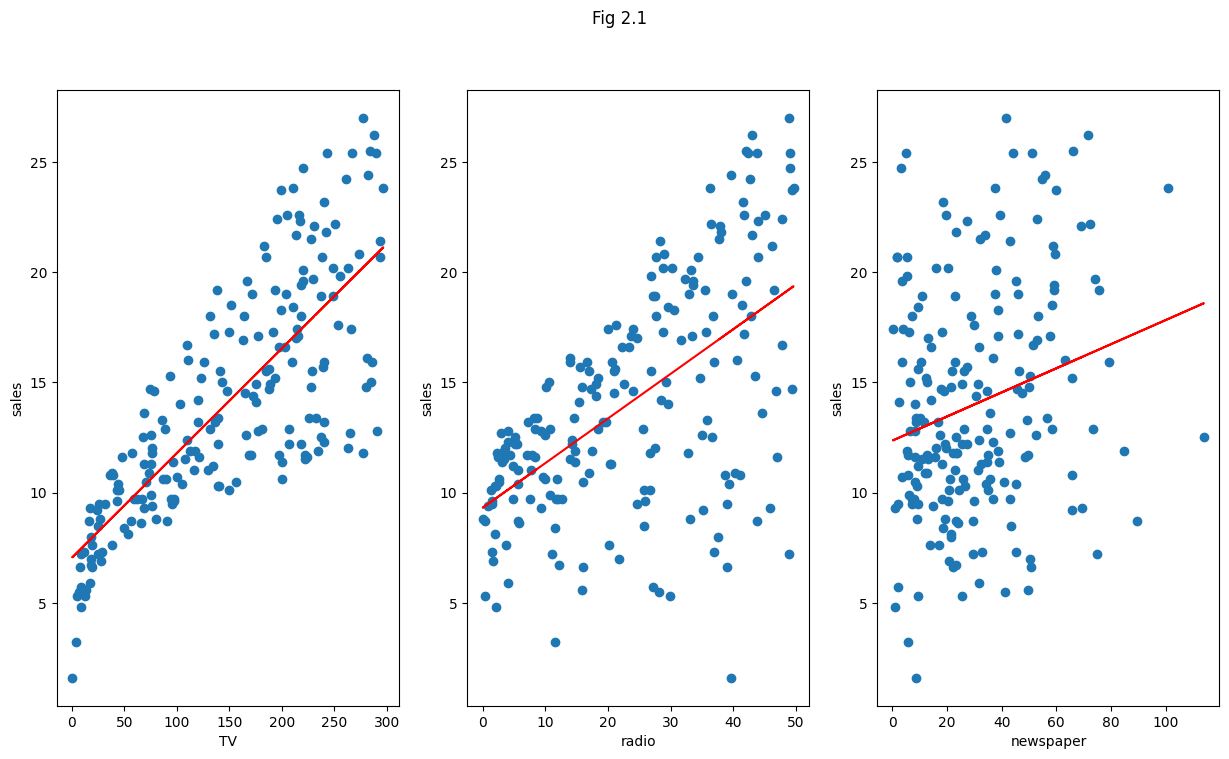

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(15, 8))
fig.suptitle('Fig 2.1')
# plot 1
# Fit with lm
regressor = linear_model.LinearRegression().fit(Advertising.loc[:,['TV']], Advertising.loc[:,'sales']) 
ax1.scatter(y = 'sales', x = 'TV', data = Advertising)
ax1.plot(Advertising.loc[:,['TV']], regressor.predict(Advertising.loc[:,['TV']]), '-r')
ax1.set_ylabel("sales"); ax1.set_xlabel("TV")
# plot 2
# Fit with lm
regressor = linear_model.LinearRegression().fit(Advertising.loc[:,['radio']], Advertising.loc[:,'sales']) 
ax2.scatter(y = 'sales', x = 'radio', data = Advertising)
ax2.plot(Advertising.loc[:,['radio']], regressor.predict(Advertising.loc[:,['radio']]), '-r')
ax2.set_ylabel("sales"); ax2.set_xlabel("radio")
# plot 3
regressor = linear_model.LinearRegression().fit(Advertising.loc[:,['newspaper']], Advertising.loc[:,'sales']) 
ax3.scatter(y = 'sales', x = 'newspaper', data = Advertising)
ax3.plot(Advertising.loc[:,['newspaper']], regressor.predict(Advertising.loc[:,['newspaper']]), '-r')
ax3.set_ylabel("sales"); ax3.set_xlabel("newspaper");

### Income Dataset

In [5]:
# get Income data
Income1 = pd.read_csv(r"Income1.csv", index_col=0)

In [6]:
Income1.head()

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


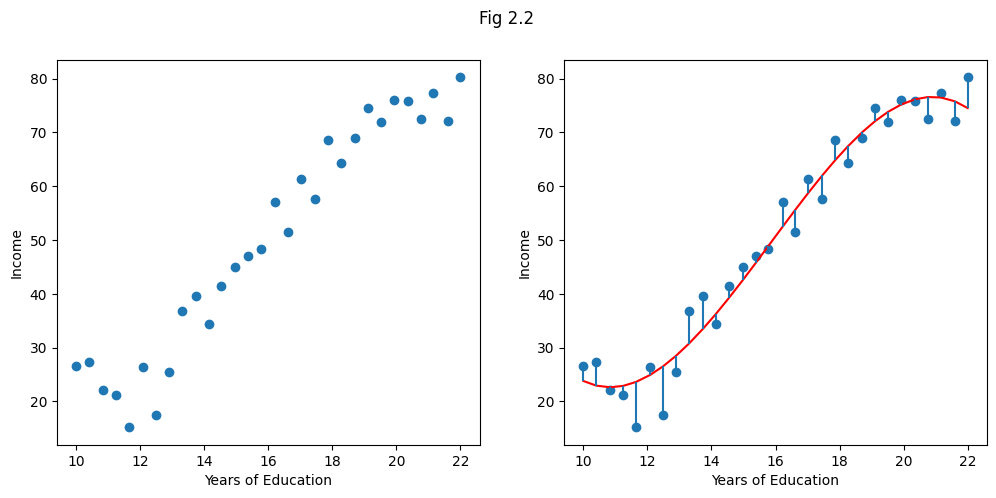

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(12, 5))
fig.suptitle('Fig 2.2')
# plot 1
ax1.scatter(y = 'Income', x = 'Education', data = Income1)
ax1.set_ylabel("Income"); ax1.set_xlabel("Years of Education")
# plot 2
income_education_model = np.poly1d(np.polyfit(Income1.Education, Income1.Income, 3))
ax2.scatter(Income1.Education, Income1.Income)
ax2.plot(Income1.Education, income_education_model(Income1.Education), '-r')
ax2.vlines(Income1.Education, income_education_model(Income1.Education), Income1.Income) # just wanted to plot those error lines
ax2.set_ylabel("Income"); ax2.set_xlabel("Years of Education");

### Income 2 Data

In [8]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# get Income data
Income2 = pd.read_csv(r"Income2.csv", index_col=0)

In [10]:
Income2.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


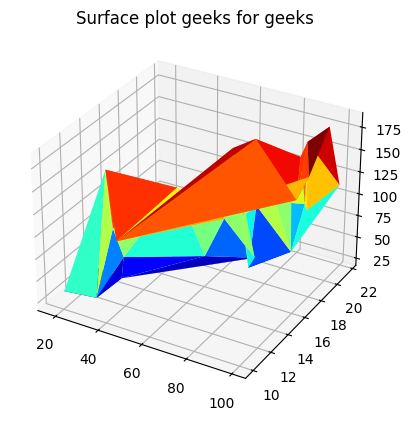

In [11]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# syntax for plotting
ax.plot_trisurf(
    Income2.Income, Income2.Education, Income2.Seniority, cmap=cm.jet, linewidth=0.2
)
ax.set_title('Surface plot geeks for geeks')
plt.show();

### Stock Market Data

In [12]:
# get wages data
Smarket = pd.read_csv(r"Smarket.csv")

In [13]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


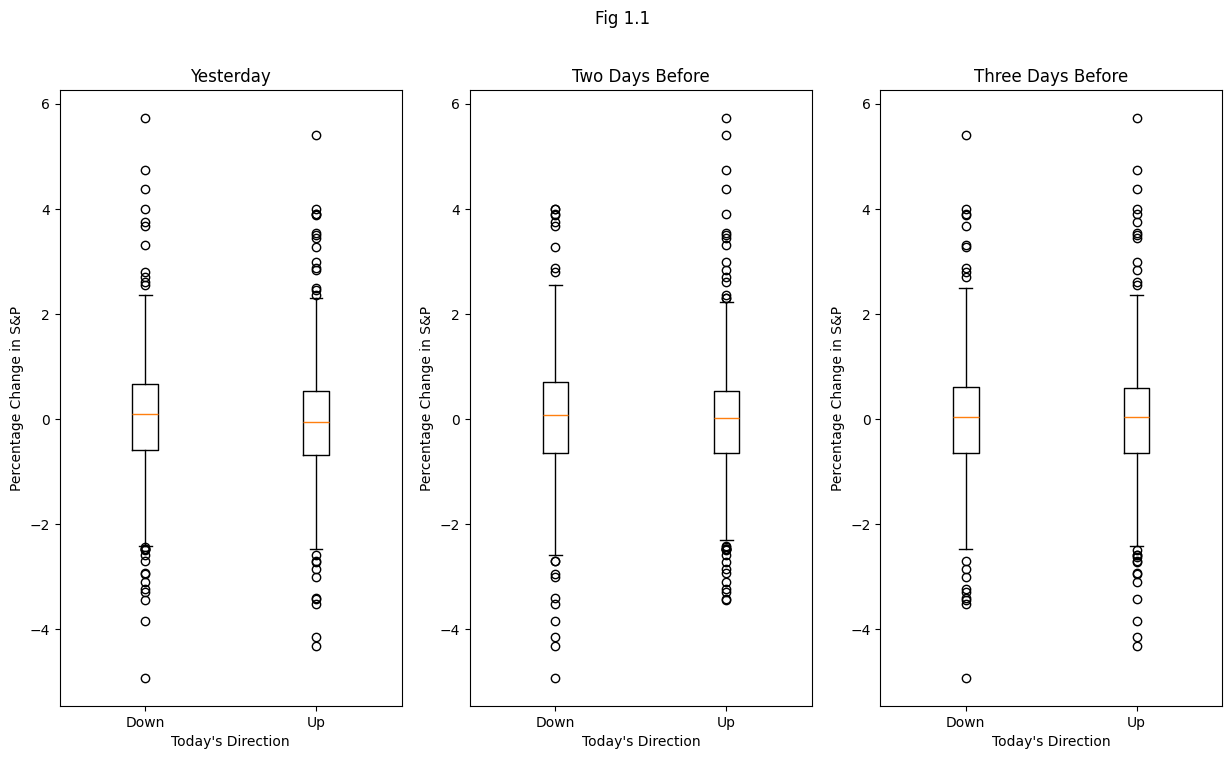

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize=(15, 8))
fig.suptitle('Fig 1.1')
# plot 1
grouped = Smarket.groupby('Direction')['Lag1']
ax1.boxplot(x=[group.values for name, group in grouped],
           tick_labels= grouped.groups.keys() )
ax1.set_ylabel("Percentage Change in S&P"); ax1.set_xlabel("Today's Direction");
ax1.set_title("Yesterday")
# plot 2
grouped = Smarket.groupby('Direction')['Lag2']
ax2.boxplot(x=[group.values for name, group in grouped],
           tick_labels= grouped.groups.keys() )
ax2.set_title("Two Days Before")
ax2.set_ylabel("Percentage Change in S&P"); ax2.set_xlabel("Today's Direction");
# plot 3
grouped = Smarket.groupby('Direction')['Lag3']
ax3.boxplot(x=[group.values for name, group in grouped],
           tick_labels= grouped.groups.keys() )
ax3.set_title("Three Days Before")
ax3.set_ylabel("Percentage Change in S&P"); ax3.set_xlabel("Today's Direction");

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

In [16]:
# train and test data
train_data = Smarket[Smarket['Year'] < 2005]
test_data = Smarket[Smarket['Year']>= 2005]
#
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_data.iloc[:,0:8], train_data.loc[:,'Direction']);

In [17]:
pred_data_test = pd.DataFrame(
    clf.predict_proba(test_data.iloc[:,0:8])
)
pred_data_test.columns = ["DOWN", "UP"]

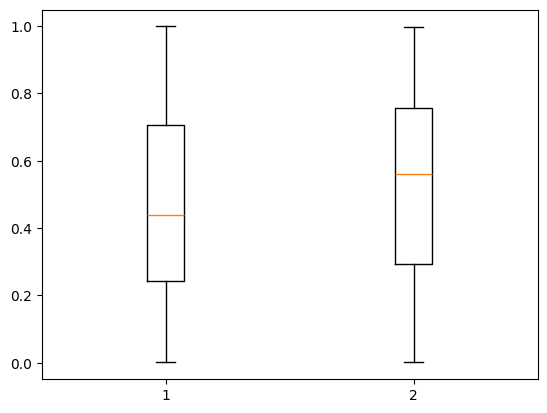

In [18]:
plt.boxplot(
    pred_data_test
);

### Gene Expression Data

In [19]:
# get wages data
# pd.read_csv(r"D:\DATAPROJECTS\ISLR\data/ALL CSV FILES - 2nd Edition/")

# Exercise Applied

## Q8

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

### (a)

In [21]:
College = pd.read_csv("College.csv", index_col=0)

In [22]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### (b)

In [23]:
college2 = pd.read_csv('College.csv')
college3 = college2.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

In [24]:
college2.head(1)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [25]:
college3.head(1)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


### (c)

In [26]:
College.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### (d)

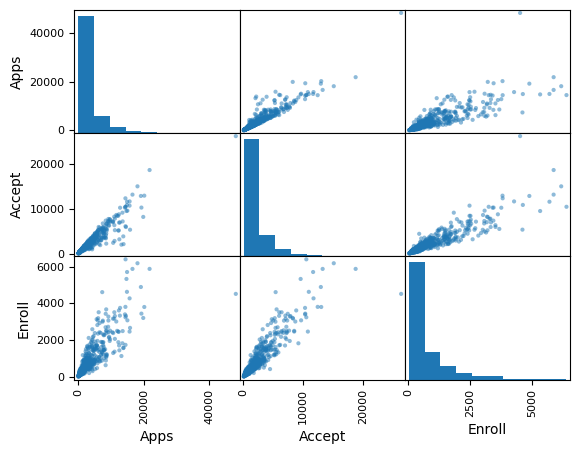

In [27]:
pd.plotting.scatter_matrix(College.iloc[:, 1:4]);

### (e)

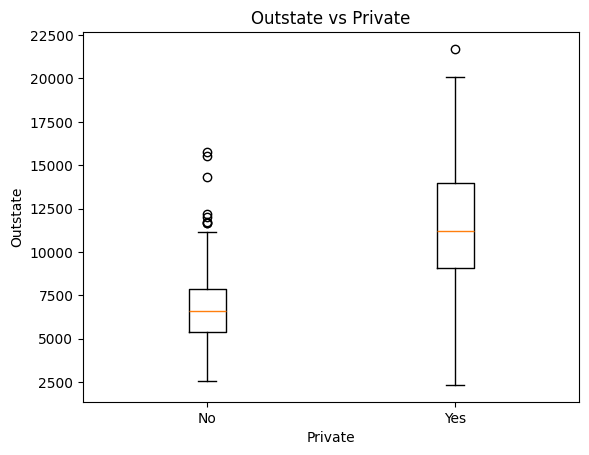

In [28]:
fig, ax = plt.subplots()
grouped = College.groupby('Private')['Outstate']
ax.boxplot(x=[group.values for name, group in grouped],
           tick_labels= grouped.groups.keys() )
ax.set_title("Outstate vs Private")
ax.set_ylabel("Outstate"); ax.set_xlabel("Private");

### (f)

In [29]:
College['Elite'] = pd.cut(College['Top10perc'], [0,50,100], labels=['No', 'Yes'])

In [30]:
College['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_16324\1651138141.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = College.groupby('Elite')['Outstate']


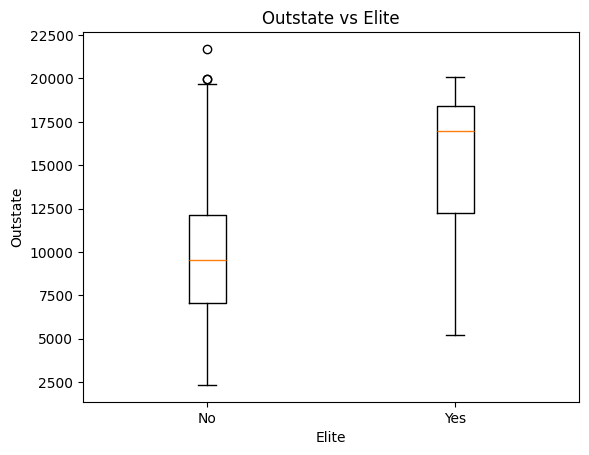

In [31]:
fig, ax = plt.subplots()
grouped = College.groupby('Elite')['Outstate']
ax.boxplot(x=[group.values for name, group in grouped],
           tick_labels= grouped.groups.keys() )
ax.set_title("Outstate vs Elite")
ax.set_ylabel("Outstate"); ax.set_xlabel("Elite");

### (g)

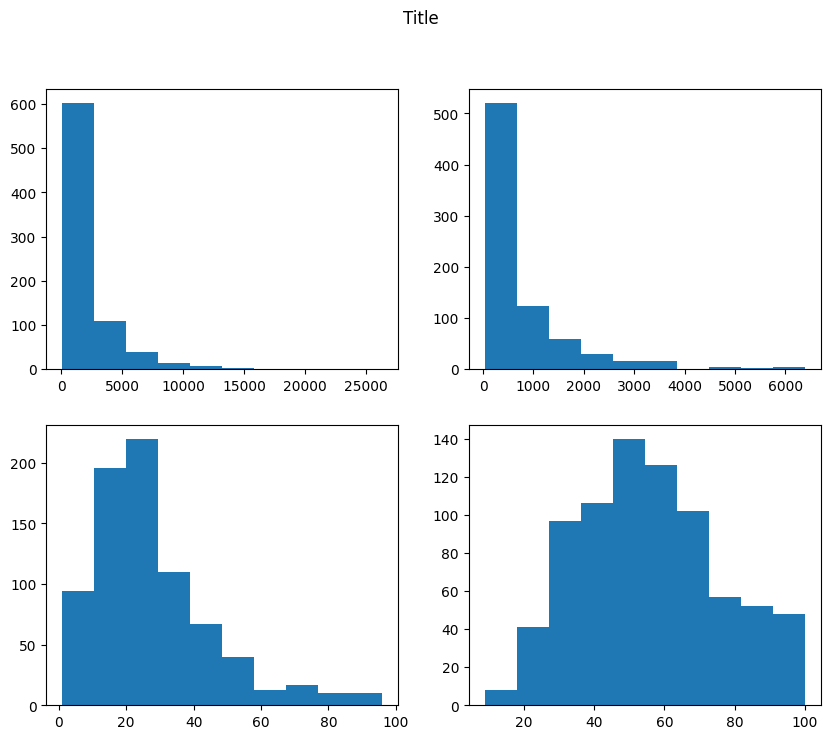

In [32]:
fig, ax = plt.subplots(2, 2,  figsize=(10, 8))
fig.suptitle('Title')
ax[0,0].hist(College.iloc[:, 2])
ax[0,1].hist(College.iloc[:, 3])
ax[1,0].hist(College.iloc[:, 4])
ax[1,1].hist(College.iloc[:, 5]);

### (h)

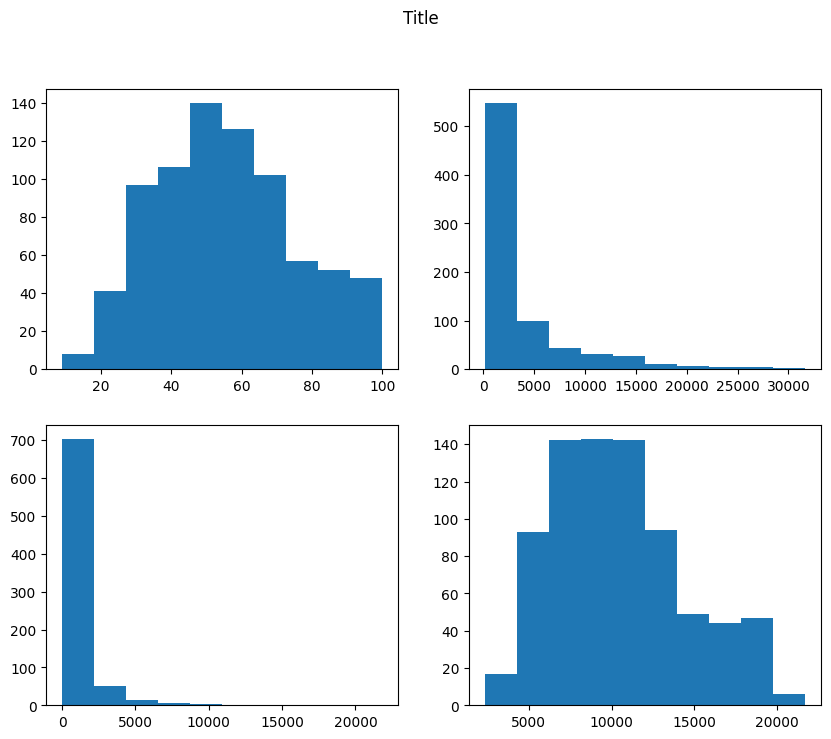

In [33]:
fig, ax = plt.subplots(2, 2,  figsize=(10, 8))
fig.suptitle('Title')
ax[0,0].hist(College.iloc[:, 5])
ax[0,1].hist(College.iloc[:, 6])
ax[1,0].hist(College.iloc[:, 7])
ax[1,1].hist(College.iloc[:, 8]);

## Q9

### (a)

In [34]:
Auto = pd.read_csv("Auto.csv")

In [35]:
Auto.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu


In [36]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


### (b)

In [37]:
import numpy as np

In [38]:
Auto.agg(['min','max'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
min,9.0,3,68.0,100,1613,8.0,70,1,amc ambassador brougham
max,46.6,8,455.0,?,5140,24.8,82,3,vw rabbit custom


### (c)

In [39]:
Auto.iloc[:, [0,1,2,4,5,6,7]].agg(['mean','std'])

,mpg,cylinders,displacement,weight,acceleration,year,origin
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549


### (d)

In [40]:
Auto.iloc[[-10,-85], [0,1,2,4,5,6,7]].agg(['mean','std'])

,mpg,cylinders,displacement,weight,acceleration,year,origin
mean,31.600000,4.0,121.000000,2302.000000,15.450000,81.000000,2.000000
std,7.919596,0.0,49.497475,400.222438,1.343503,1.414214,1.414214


### (e)

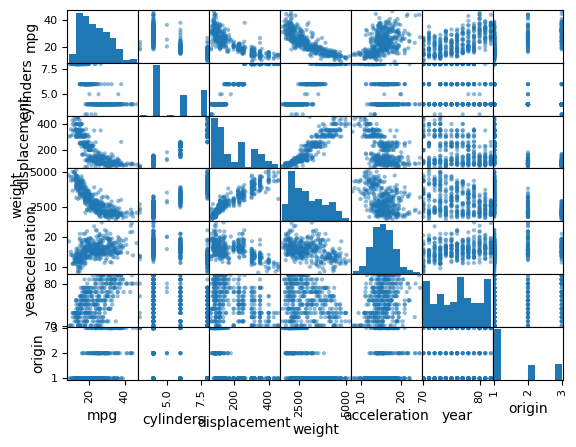

In [41]:
#
pd.plotting.scatter_matrix(Auto.iloc[:, [0,1,2,4,5,6,7]]);

### (f)

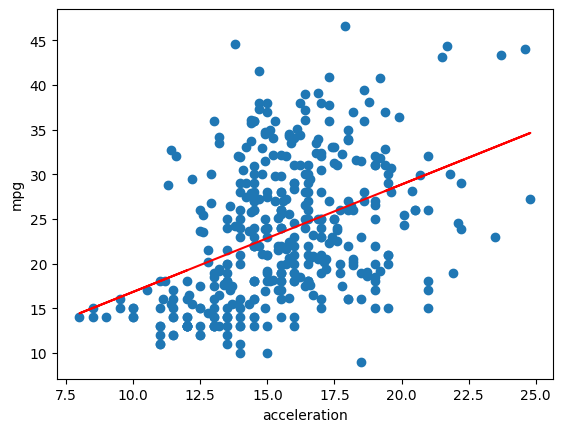

In [42]:
# Fit with lm
regressor = linear_model.LinearRegression().fit(Auto.loc[:,['acceleration']], Auto.loc[:,'mpg']) 
plt.scatter(y = 'mpg', x = 'acceleration', data = Auto)
plt.plot(Auto.loc[:,['acceleration']], regressor.predict(Auto.loc[:,['acceleration']]), '-r')
plt.ylabel("mpg"); plt.xlabel("acceleration");

# Q10

### (a)

In [43]:
Boston = pd.read_csv("Boston.csv", index_col=0)

In [44]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### (b)

In [45]:
Boston.shape

(506, 13)

### (c)

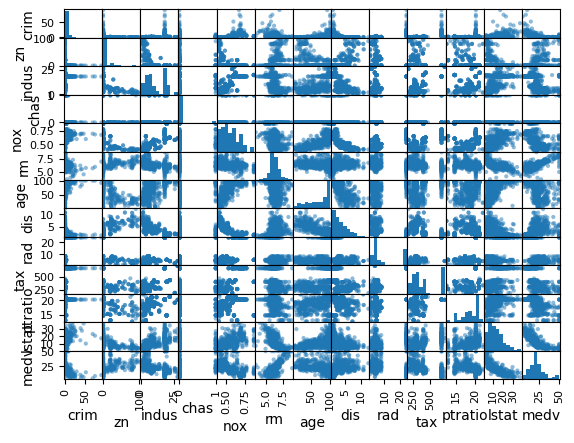

In [46]:
pd.plotting.scatter_matrix(Boston);

### (d)

In [47]:
Boston.corr().style.background_gradient()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


+ Rad : index of accessibility to radial highways.
+ Tax: full-value property-tax rate per $10,000.

### (e)

In [48]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### (f)

In [49]:
Boston[Boston.chas == 1].shape[0]

35

### (g)

In [50]:
Boston.loc[:,'ptratio'].agg(['median'])

median    19.05
Name: ptratio, dtype: float64

In [51]:
Boston.ptratio.median()

np.float64(19.05)

### (h)

In [52]:
Boston[Boston.medv == Boston.medv.min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


+ high crim, per capita crime rate by town.
+ low zn proportion of residential land zoned for lots over 25,000 sq.ft.
+ high indus: proportion of non-retail business acres per town.
+ no bounds to chas: Charles River
+ high nox: nitrogen oxides concentration (parts per 10 million).
+ close to 1st qu rm:average number of rooms per dwelling.
+ maximum  age: proportion of owner-occupied units built prior to 1940.
+ above average dis: weighted mean of distances to five Boston employment centres
+ max rad: index of accessibility to radial highways.
+ 3rd Qu tax: full-value property-tax rate per $10,000.
+ 3rd Qu ptratio: pupil-teacher ratio by town.
+ Above 3rd Qu lstat: lower status of the population (percent).
+ minimum medv: median value of owner-occupied homes in \$1000s.

### (i)

In [53]:
Boston[Boston.rm > 7].shape[0]

64

In [54]:
Boston[Boston.rm > 8].shape[0]

13